# Punktkälla

I den här första uppgiften ska vi bestämma dosraten från en punktformig källa med given styrka (intensitet) och $\gamma$-energi.

Flödet $\phi$ på avståndet $R$ från källan ges av $$\phi = \frac{S}{4\pi R^2},$$ där $S$ är källans intensitet (antal utsända $\gamma$-fotoner per sekund). Detta samband beskriver alltså hur flödet avtar med *avståndet i kvadrat*.

Dosraten $D$ från $\gamma$-fotonerna ges av sambandet $$D = K\phi,$$ där $\phi$ är flödet av $\gamma$-fotoner och $K$ är en omvandlingsfaktor som beror på energi och fås från tabeller. I ert fall kan $K$ läsas ut från Figur 14.14 i kompendiet.

Om källan skärmas behöver flödet (och därför också dosraten) korrigeras enligt Bergers ekvation: $$B = 1 + C\mu x\cdot \exp[D\mu x],$$ där $x$ är tjockleken på skärmningen, $\mu$ är den linjära dämpningskoefficienten för skärmen och $C$ och $D$ är parametrar som beror på skärmens material och $\gamma$-fotonens energi. Också dämpningskoefficienten beror på skärmens material och $\gamma$-fotonens energi. I ert fall kan $\mu$ läsas ut från bilaga 1 i kompendiet och $C$ och $D$ från bilaga 7 i kompendiet.

### Exempel 1: ingen skärmning

Vi börjar med att titta på hur flödet $\phi$ och dosraten $D$ avtar med avstånd från källan, i avsaknad av skärmning.

Vi antar här att källan har en styrka på $S = 10^6$ fotoner per sekund och att fotonenergin är 500 keV. Från Figur 14.14 i kompendiet utläser vi att $K \approx 1,2\cdot10^{-5}$ mSv/h per fotoner/(cm$^2$ s). Detta betyder att ett flöde på $\phi = 1$ cm$^{-2}$ s$^{-1}$ ger en dosrat $D = 1,2\cdot10^{-5}$ mSv/h.

Nu kan vi räkna ut flödena och dosraterna vid ett antal avstånd från källan. För att köra uträkningen, klicka på cellen med koden och sedan "Run" längst upp på skärmen.

(0.0, 100.0)

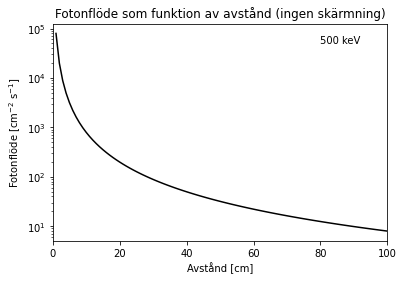

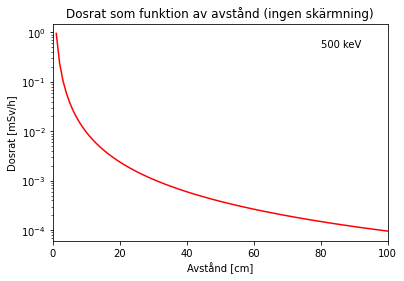

In [24]:
import numpy as np
import matplotlib.pyplot as plt

S = 1e6       # källan har en intensitet på 10^6 = 1e6 fotoner per sekund.
K = 1.2e-5    # utläst från Figur 14.14 enligt ovan.

R = np.linspace(1, 100, 100)        # skapa en lista med värden på avståndet från källan som ska undersökas. Listan går från 1 till 100 cm.

# Räkna först ut och rita upp flödet som funktion av R
phi = S/(4.*np.pi*np.power(R, 2))   # Räkna ut flödet för alla R i listan ovan.

plt.figure()
plt.plot(R, phi, color='black')         # rita graf av flödet som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Fotonflöde [cm$^{-2}$ s$^{-1}$]')
plt.title('Fotonflöde som funktion av avstånd (ingen skärmning)')
plt.text(80, 5e4, '500 keV')
plt.xlim(0, 100)

# Räkna sedan ut och rita upp dosraten som funktion av R
D = K*phi   # Räkna ut dosraten för alla flöden ovan.

plt.figure()
plt.plot(R, D, color='red')         # rita graf av dosraten som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Dosrat [mSv/h]')
plt.title('Dosrat som funktion av avstånd (ingen skärmning)')
plt.text(80, 5e-1, '500 keV')
plt.xlim(0, 100)

In [3]:
import numpy as np


S = 3.7e14    # Bq (s^-1)
L = 500       # cm
#H = 150
T = 8         # cm
K = 1e-5      # mSv/h per cm^-2 s^-1
mu = 0.3      # cm^-1
C = 2
D = 0.1

#H = 0
#H1 = 10

H = np.arange(0, 160, 10)



R = np.sqrt(np.power(L, 2) + np.power(H, 2))

# Likformig triangel med sidorna L och R som triangeln med sidorna T och X. Alltså: L/R = T/X => X = (T/L)*R.

X = (T/L)*R





# Build up (Berger):
B = 1 + C*mu*X*np.exp(D*mu*X)

# Flöde:
phi = (S/(4.*np.pi*np.power(R, 2)))*B*np.exp(-mu*X)

# Dosrat:
D0 = K*phi

print(R)
print(B)
print(D0)

[500.         500.09999    500.39984013 500.89919145 501.59744816
 502.49378106 503.58713248 504.87622245 506.35955605 508.03543184
 509.90195136 511.95702945 514.19840529 516.62365412 519.23019943
 522.01532545]
[7.10199592 7.10350913 7.10804773 7.11560865 7.12618677 7.13977501
 7.15636431 7.17594373 7.1985005  7.22402012 7.25248642 7.28388166
 7.31818667 7.35538091 7.39544261 7.43834888]
[758.79683958 758.29102237 756.77643851 754.26165498 750.76082942
 746.29353218 740.88450261 734.56334531 727.36417269 719.32520155
 710.48831203 700.89857763 690.60377537 679.65388514 668.10058668
 655.99676267]


[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

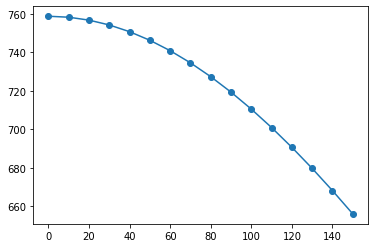

In [4]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

h = np.linspace(-10, 10, 100)
l = np.linspace(10, 100, 100)

hh, ll = np.meshgrid(h, l)

print(h)
print(l)

print(hh)

rr = np.sqrt(np.power(ll, 2) + np.power(hh, 2))

print(rr)

xx = (T/ll)*rr

BB = 1 + C*mu*xx*np.exp(D*mu*xx)

phiphi = (S/(4.*np.pi*np.power(rr, 2)))*BB*np.exp(-mu*xx)

D0D0 = K*phiphi

print(xx)
print(BB)
print(phiphi)
print(D0D0)

#fig, ax = plt.subplots()
#
#lev_exp = np.arange(np.floor(np.log10(D0D0.min())-1), np.ceil(np.log10(D0D0.max())+1), 0.5)
#print(lev_exp)
#levs = np.power(10, lev_exp)
#
#cs = plt.contourf(hh, ll, D0D0, levs, locator=ticker.LogLocator())
#
#cbar = fig.colorbar(cs)

plt.plot(H, D0, marker='o')

Line source

[-50. -40. -30. -20. -10.   0.  10.  20.  30.  40.  50.  60.  70.  80.
  90. 100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210. 220.
 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330. 340. 350.]
2.5
1.5625955626789834
7.5
1.4827327340571512
12.5
1.4008717817036005
17.5
1.3179465000646622
22.5
1.2348311616954748
27.5
1.1523272803108038
32.5
1.0711538220579386
37.5
0.9919408002802332
42.5
0.9152260519685083
47.5
0.841454887640894
52.5
0.7709822319335459
57.5
0.7040768286550169
62.5
0.6409270684925502
67.5
0.5816480057139547
72.5
0.5262891571433511
77.5
0.4748427172823831
82.5
0.42725187280861904
87.5
0.38341895344115684
92.5
0.3432132106542198
97.5
0.30647806806150774
102.5
0.2730377353908461
107.5
0.24270312045138076
112.5
0.2152770096276177
117.5
0.1905585169968913
122.5
0.1683468253383906
127.5
0.14844425954567547
132.5
0.13065874491665055
137.5
0.11480571021889441
142.5
0.10070949908849407
147.5
0.0882043539717368
152.5
0.07713503516163457
157.5
0.06735713413973489
162.

1.0711538220579386
152.5
1.1523272803108038
157.5
1.2348311616954748
162.5
1.3179465000646622
167.5
1.4008717817036005
172.5
1.4827327340571512
177.5
1.5625955626789834
182.5
1.6394835377126702
187.5
1.7123966487886269
192.5
1.780333856108825
197.5
1.8423172785091917
202.5
1.8974174908904897
207.5
1.9447789684740122
212.5
1.983644627722151
217.5
2.0133783847341964
222.5
2.0334846887126887
227.5
2.0436240927328764
232.5
2.0436240927328764
237.5
2.0334846887126887
242.5
2.0133783847341964
247.5
1.983644627722151
252.5
1.9447789684740122
257.5
1.8974174908904897
262.5
1.8423172785091917
267.5
1.780333856108825
272.5
1.7123966487886269
277.5
1.6394835377126702
282.5
1.5625955626789834
287.5
1.4827327340571512
292.5
1.4008717817036005
297.5
1.3179465000646622
2.5
0.029065801405642584
7.5
0.03353525305850938
12.5
0.038648828124898366
17.5
0.044490264158127124
22.5
0.05115228010933338
27.5
0.05873713594558478
32.5
0.06735713413973489
37.5
0.07713503516163457
42.5
0.0882043539717368
47.5
0.100

(-50.0, 350.0)

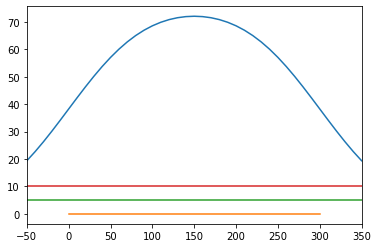

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Först specificerar vi några viktiga inputs:

S = 1e12    # Bq (s^-1 cm^-1). Källterm per cm för linjekällan
L1 = 300      # Linjekällans längd, cm
N_segment = 60        # Antal segment av linjekällan (för integrering)
H = 200       # cm, avstånd källa till detektor
T = 20         # cm
K = 3.2e-5      # mSv/h per cm^-2 s^-1
mu = 0.35      # cm^-1
C = 0.7
D = 0.03

Xm = np.linspace(-50, 350, 41)        # Stegen detektorn flyttar sig längs
D0 = np.zeros(len(Xm))                # Initialisera dosraten till 0

print(Xm)

   
for xm_no in range(len(Xm)):      # loop over x values
    # För varje steg i integreringen, räkna ut mittpunkten på segmentet:
    Segment_langd = L1/N_segment
    for segment_no in range(N_segment):            # Räkna ut bidraget till dosen från varje segment av källan
        Segment_mittpunkt = Segment_langd*segment_no + Segment_langd/2.

        print(Segment_mittpunkt)

        R = np.sqrt(np.power(H, 2) + np.power(Segment_mittpunkt-Xm[xm_no], 2))

        X = (R/H)*T         # effektiv tjocklek av skärmen

        # Build up (Berger):
        B = 1 + C*mu*X*np.exp(D*mu*X)

        # Flöde:
        phi = (S*Segment_langd/(4.*np.pi*np.power(R, 2)))*B*np.exp(-mu*X)      # multiplicera S med segmentets längd för att få emission för hela "punktkällan"

        # Dosrat:
        D_segment = K*phi

        print(D_segment)

        D0[xm_no] += D_segment
    
    
print(D0)    


plt.plot(Xm, D0)
plt.plot([0, 300], [0, 0])             # källan
plt.plot([-1000, 1000], [5, 5])        # skärm
plt.plot([-1000, 1000], [10, 10])      # skärm

plt.xlim(-50, 350)

